In [6]:
# LOADING DATA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("tested.csv")
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
dataset['Age'] = pd.to_numeric(dataset['Age'], errors='coerce')
age_mean = dataset['Age'].mean()
fare_mean = dataset["Fare"].mean()
dataset.fillna({"Age": age_mean}, inplace=True)
dataset.fillna({"Fare":fare_mean}, inplace=True)
dataset['Age'] = dataset['Age'] + 0.5
dataset.drop(columns = ["Cabin"], inplace = True)

dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [54]:
dataset.drop(columns=["Name"], inplace=True)

In [57]:
dataset = pd.get_dummies(dataset, columns=['Sex', 'Embarked'], drop_first=True)

In [59]:
dataset.drop(columns=["Ticket"], inplace=True)

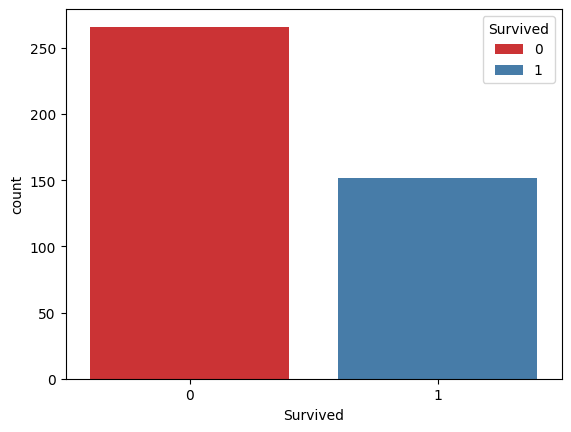

In [17]:
sns.countplot(x="Survived", data=dataset, palette="Set1", hue="Survived")
plt.show()

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

X = dataset.drop(columns="Survived")
y = dataset["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_prediction = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_prediction))
print('Classification Report:')
print(classification_report(y_test, y_prediction))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



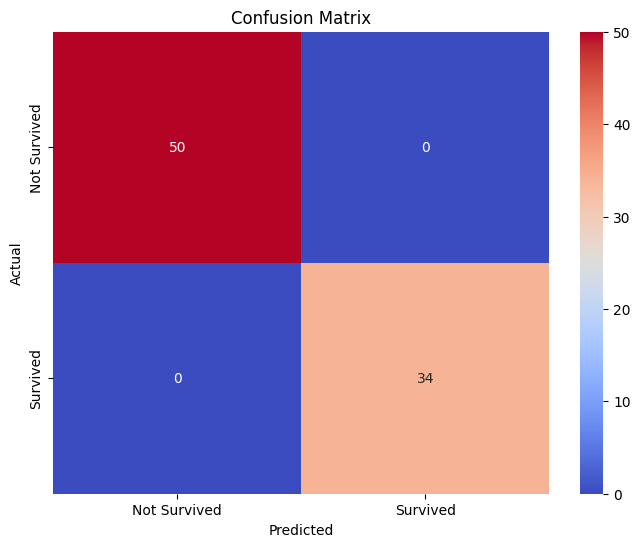

In [66]:
# Visualization

cm = confusion_matrix(y_test, y_prediction)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

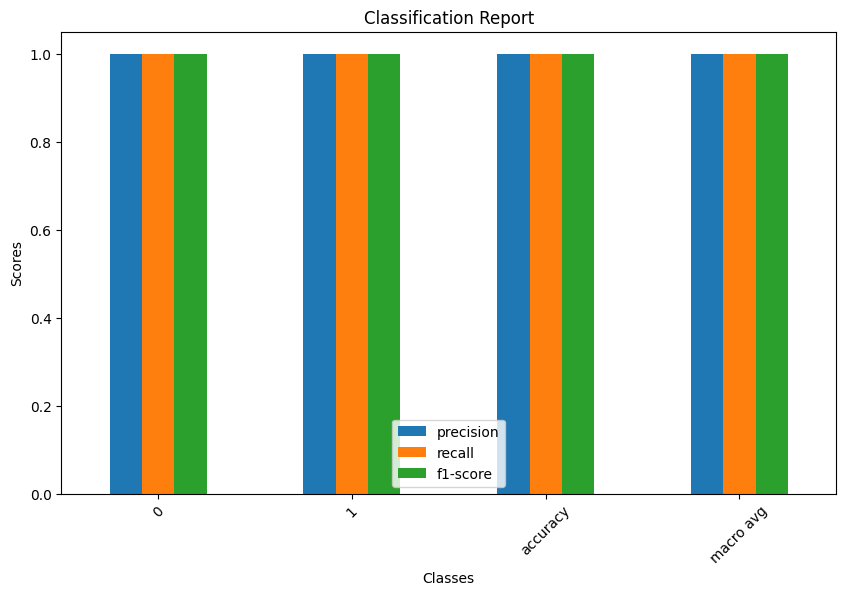

In [68]:
# Classification report visualization

report = classification_report(y_test, y_prediction, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Create a bar plot
metrics = report_df[['precision', 'recall', 'f1-score']].iloc[:-1]
metrics.plot(kind='bar', figsize=(10, 6))

plt.title('Classification Report')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()